<a href="https://colab.research.google.com/github/CN-McLaren/CN-McLaren/blob/main/INFS2822.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

In [ ]:
df = pd.read_excel('/NSW_Road_Crash_Data_2017-2021_CRASH.xlsx')
df

,CrashID,Degree_of_crash,Degree_of_crash_detailed,Reporting_year,Year_of_crash,Month_of_crash,Day_of_week_of_crash,Two_hour_intervals,Street_of_crash,Street_type,...,DCA_description,DCA_supplement,First_impact_type,Key_TU_type,Other_TU_type,No_of_traffic_units_involved,No_killed,No_seriously_injured,No_moderately_injured,No_minor_other_injured
0,1122708,Fatal,Fatal,2017.0,2017.0,January,Monday,18:00 - 19:59,HOLLOWAYS,RD,...,Off cway right bend,Left,Rollover,Station wagon,NaN,1,1,0,0,0
1,1122709,Fatal,Fatal,2017.0,2017.0,January,Monday,12:00 - 13:59,PUTTY,RD,...,Opp - Head on,NaN,Head-on,Motorcycle,Light truck,3,1,1,1,0
2,1122710,Fatal,Fatal,2017.0,2017.0,January,Tuesday,14:00 - 15:59,IRRIGATION,WAY,...,Same - Rear right,NaN,Rear end,Artic tanker,Car (sedan/hatch),3,2,0,1,0
3,1123942,Fatal,Fatal,2017.0,2017.0,January,Thursday,10:00 - 11:59,VARDYS,RD,...,Ped - On carriageway,NaN,Vehicle - Pedestrian,Semi-trailer,Pedestrian,2,1,0,1,0
4,1123948,Fatal,Fatal,2017.0,2017.0,January,Saturday,12:00 - 13:59,PRINCES,HWY,...,Opp - Head on,NaN,Head-on,Car (sedan/hatch),4 wheel drive,2,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101713,1298478,Injury,Minor/Other Injury,2021.0,2021.0,May,Tuesday,10:00 - 11:59,EMPIRE BAY,DR,...,Off left bend into obj,Left,Vehicle - Object,Car (sedan/hatch),NaN,1,0,0,0,1
101714,1298482,Injury,Minor/Other Injury,2021.0,2021.0,July,Saturday,12:00 - 13:59,DENHAM COURT,RD,...,Opp - Right-thru,NaN,Other angle,Car (sedan/hatch),Car (sedan/hatch),2,0,0,0,1
101715,1299029,Non-casualty (towaway),Non-casualty (towaway),2021.0,2021.0,February,Tuesday,06:00 - 07:59,MARYLAND,DR,...,Opp - Right-thru,NaN,Other angle,4 wheel drive,Light truck utility(from 2018),2,0,0,0,0
101716,1299030,Non-casualty (towaway),Non-casualty (towaway),2021.0,2021.0,November,Monday,16:00 - 17:59,MONA VALE,RD,...,On path - Previous accident,NaN,Other angle,Car (sedan/hatch),Station wagon,4,0,0,0,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Check df datatypes
df.dtypes

CrashID                           int64
Degree_of_crash                  object
Degree_of_crash_detailed         object
Reporting_year                  float64
Year_of_crash                   float64
Month_of_crash                   object
Day_of_week_of_crash             object
Two_hour_intervals               object
Street_of_crash                  object
Street_type                      object
Distance                        float64
Direction                        object
Identifying_feature              object
Identifying_feature_type         object
Town                             object
Route_no                        float64
School_zone_location             object
School_zone_active               object
Type_of_location                 object
Latitude                        float64
Longitude                       float64
LGA                              object
Urbanisation                     object
Alignment                        object
Primary_permanent_feature        object


In [ ]:
# Check which columns contain null values
df.isnull().any()

CrashID                         False
Degree_of_crash                 False
Degree_of_crash_detailed         True
Reporting_year                   True
Year_of_crash                    True
Month_of_crash                   True
Day_of_week_of_crash             True
Two_hour_intervals               True
Street_of_crash                  True
Street_type                      True
Distance                         True
Direction                        True
Identifying_feature              True
Identifying_feature_type        False
Town                             True
Route_no                         True
School_zone_location             True
School_zone_active               True
Type_of_location                 True
Latitude                         True
Longitude                        True
LGA                              True
Urbanisation                     True
Alignment                        True
Primary_permanent_feature        True
Primary_temporary_feature        True
Primary_haza

In [ ]:
df.isnull().sum()

CrashID                              0
Degree_of_crash                      0
Degree_of_crash_detailed             4
Reporting_year                       4
Year_of_crash                        4
Month_of_crash                       4
Day_of_week_of_crash                 5
Two_hour_intervals                   5
Street_of_crash                      4
Street_type                          4
Distance                             3
Direction                            4
Identifying_feature                  4
Identifying_feature_type             0
Town                                 1
Route_no                         36722
School_zone_location                 1
School_zone_active                   1
Type_of_location                     2
Latitude                             3
Longitude                            3
LGA                                  3
Urbanisation                         2
Alignment                            2
Primary_permanent_feature        76985
Primary_temporary_feature

3.1. Tasks

Question 1

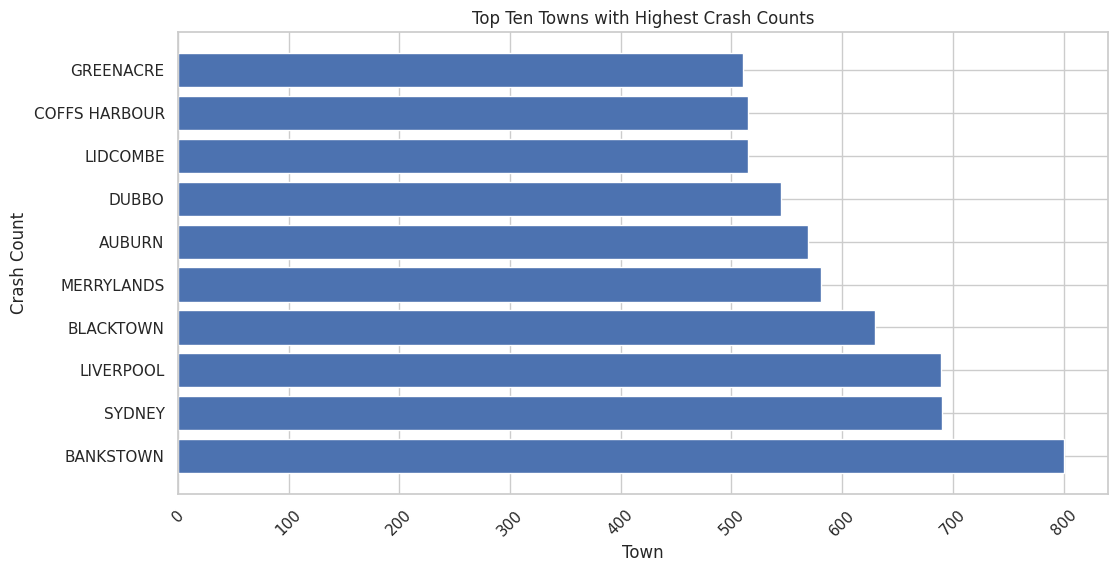

In [ ]:
# Remove Rows with Null town and year of crash data
df_noNanTndYofC = df.dropna(subset=['Town', 'Year_of_crash'])

# Remove Rows with year of crash occuring in 2016
df_noTownNanNo2016 = df_noNanTndYofC.drop(df_noNanTndYofC[df_noNanTndYofC['Year_of_crash'] == 2016.0].index)

# Filter only top 10 towns with highest crashes
top10TownsWithHighestCrashes = df_noTownNanNo2016['Town'].value_counts()[:10]

sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
plt.barh(top10TownsWithHighestCrashes.index, top10TownsWithHighestCrashes.values)
plt.xticks(rotation=45)
plt.xlabel('Town')
plt.ylabel('Crash Count')
plt.title('Top Ten Towns with Highest Crash Counts')
plt.show()

Question 2

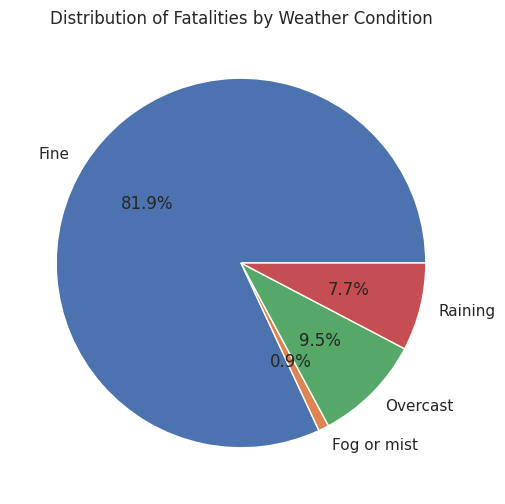

In [ ]:
# Remove Rows with Null Weather ana year of crash data
dfDropNa = df.dropna(subset=['Weather', 'Year_of_crash'])

#Drop all weather conditions that do not meet the prevalant_weather_conditions condition
prevalent_Weather_Conditions = ['Fine', 'Raining', 'Overcast', 'Fog or mist']
dfNoLesserConditions = dfDropNa[dfDropNa['Weather'].isin(prevalent_Weather_Conditions)]

#Drop all rows that are not fatal
dfFiltered = dfNoLesserConditions.drop(dfNoLesserConditions[dfNoLesserConditions['Degree_of_crash'] != 'Fatal'].index)

#Group weather by sum of total fatalities
fatalitiesByWeather = dfFiltered.groupby('Weather')['No_killed'].sum()

plt.figure(figsize=(12, 6))
pie_Chart_Labels = fatalitiesByWeather.index
pie_Chart_Values = fatalitiesByWeather.values
plt.pie(pie_Chart_Values, labels = pie_Chart_Labels, autopct='%.1f%%')
plt.title('Distribution of Fatalities by Weather Condition')
plt.show()

Question 3 (**Same code on Jupyter shows the exact same plot as assignment**

In [ ]:
#Remove rows with missing values in the 'Year_of_crash' column
df = df.dropna(subset=['Year_of_crash'])
#Filter the DataFrame to keep only rows where 'Year_of_crash' is greater than or equal to 2017.
df[df['Year_of_crash'] >= 2017]
#Convert the 'Year_of_crash' column to integers in order to make YYYY.0 to YYYY
df['Year_of_crash'] = df['Year_of_crash'].astype(int)
#Create a new column 'YearMonth' by combining 'Year_of_crash' as a string with the first three characters of 'Month_of_crash'.
df['YearMonth'] = df['Year_of_crash'].astype(str) + '-' + df['Month_of_crash'].str.slice(0, 3)

#Group the data by 'YearMonth' and calculate the sum of 'No_killed' for each group
monthly_data = df.groupby('YearMonth')['No_killed'].sum().reset_index()

#Sort the data in chronological order by 'YearMonth'
monthly_data['YearMonth'] = pd.to_datetime(monthly_data['YearMonth'], format='%Y-%b')
monthly_data = monthly_data.sort_values(by='YearMonth')

#Create a bar plot for the distribution of the number of people killed
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(monthly_data['YearMonth'], monthly_data['No_killed'], width=20, alpha=0.5)
#Set axis labels
ax.set_xlabel('Year-Month')
ax.set_ylabel('Number of People Killed')
#Set the title of the plot
ax.set_title('Number of People Killed in between 2017 and 2021')
#Set the x-axis ticks and labels
xticks = monthly_data['YearMonth']
xticklabels = [x.strftime('%Y-%b') for x in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=90,fontsize=8)
#Create a line plot that touches the tops of the bar plots
ax.plot(monthly_data['YearMonth'], monthly_data['No_killed'], color='r')
#Show the plot
plt.show()


Question 4

In [ ]:
print(df.columns)

Index(['CrashID', 'Degree_of_crash', 'Degree_of_crash_detailed',
       'Reporting_year', 'Year_of_crash', 'Month_of_crash',
       'Day_of_week_of_crash', 'Two_hour_intervals', 'Street_of_crash',
       'Street_type', 'Distance', 'Direction', 'Identifying_feature',
       'Identifying_feature_type', 'Town', 'Route_no', 'School_zone_location',
       'School_zone_active', 'Type_of_location', 'Latitude', 'Longitude',
       'LGA', 'Urbanisation', 'Alignment', 'Primary_permanent_feature',
       'Primary_temporary_feature', 'Primary_hazardous_feature',
       'Street_lighting', 'Road_surface', 'Surface_condition', 'Weather',
       'Natural_lighting', 'Signals_operation', 'Other_traffic_control',
       'Speed_limit', 'Road_classification', 'RUM_code', 'RUM_description',
       'DCA_code', 'DCA_description', 'DCA_supplement', 'First_impact_type',
       'Key_TU_type', 'Other_TU_type', 'No_of_traffic_units_involved',
       'No_killed', 'No_seriously_injured', 'No_moderately_injured',
   

NameError: ignored

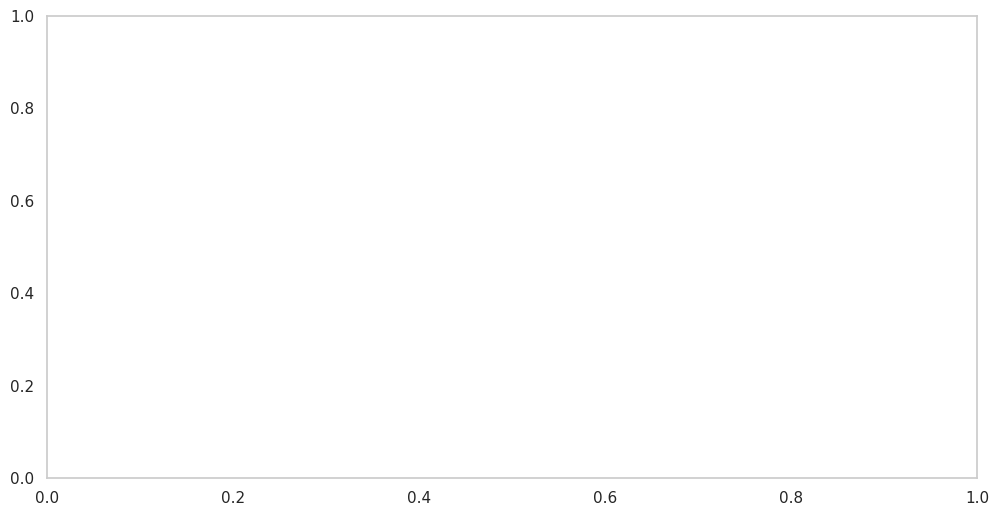

In [ ]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Remove the background grid
ax1.grid(False)
ax1.set_facecolor('none')

# Line plot for fatalities
ax1.plot(pivot_data['Year_of_crash'], pivot_data['Fatalities'], color='red', marker='o', label='Fatalities')
ax1.set_xlabel('Year')
ax1.set_ylabel('Fatalities', color='red')
ax1.tick_params('y', colors='red')
ax1.set_ylim(280, 380)
ax1.set_yticks(range(240, 381, 20))

# Bar chart for injuries
ax2 = ax1.twinx()
ax2.bar(pivot_data['Year_of_crash'], pivot_data['Injuries'], color='lightblue', label='Injuries', alpha=0.7)
ax2.set_ylabel('Injuries', color='blue')
ax2.tick_params('y', colors='blue')
ax2.set_ylim(0, 20000)
ax2.set_yticks(range(0, 20001, 2500))

# Annotating the fatalities count
for i, txt in enumerate(pivot_data['Fatalities']):
    ax1.annotate(txt, (pivot_data['Year_of_crash'].iloc[i], pivot_data['Fatalities'].iloc[i] + 5), color='red', ha='center')

# Adding legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Trend in Fatalities and Injuries Over the Years')
fig.tight_layout()
plt.show()


Question 5

In [ ]:
#Remoe unknown values from Speed limit
df_noUnknownSpeed = df[df['Speed_limit'] != 'Unknown']

#Extract the numeric value from Speed Limit object
df_noUnknownSpeed['speed_limit_numeric'] = df_noUnknownSpeed['Speed_limit'].str.replace(' km/h', '').astype('int')

#Order by speed limit
df_noUnknownSpeed = df_noUnknownSpeed.sort_values(by='speed_limit_numeric')


hue_order = ['Fatal', 'Injury', 'Non-casualty (towaway)']
plt.figure(figsize=(8, 7))
sl=sns.histplot(x='Speed_limit', hue='Degree_of_crash', data =df_noUnknownSpeed,alpha=0.5,hue_order=hue_order,binwidth=4)
plt.xticks(rotation=45)
sl.set(xlabel='Speed',title='Accident Statistics by Speed Limit')
sl.legend_.set_title('')
plt.show()

Question 6

In [ ]:
df['Location'] = df['Town'] + '-' + df['Street_of_crash'] + ' '+ df['Street_type']
topLocWithHighCrashes_or = df['Location'].value_counts()[:10].index
plt.figure(figsize=(10, 6))
sns.countplot(y='Location', data=df,order=topLocWithHighCrashes_or,color='dodgerblue')
plt.xlabel('Count')
plt.ylabel('')
plt.title('Worst location by Count')
plt.show()

In [ ]:
# Calculate the 'Magnitude' as the sum of 'no_killed' and 'no_seriously_injured'
df['Magnitude'] = df['No_killed'] + df['No_seriously_injured']
df = df[df['Magnitude'] > 0]


# Create heatmap
fig = px.density_mapbox(df, lat='Latitude', lon='Longitude', z='Magnitude', radius=10,
                        center=dict(lat=-33.88934,lon=151.1323), zoom=5,
                        mapbox_style="stamen-terrain",
                        animation_frame='Year_of_crash', title='Crash Density Heatmap')
# Show the interactive heatmap
fig.show()